# maxvogt-analysis: Sevelen

The code in this notebook is based on [Martin Fleischmann's](https://martinfleischmann.net/) 2021 workshop [*Capturing the Structure of Cities with Data Science (SDSC)*](https://github.com/martinfleis/sdsc21-workshop), licensed under the [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/). © 2021 Martin Fleischmann.

The geodata in this notebook is retrieved from OpenStreetMap. © OpenStreetMap Contributors.

<hr>

This notebook contains geodata and analyses for the following items of the [Max Vogt collection](https://mtwente.github.io/maxvogt/) by Moritz Twente and Luisa Omonsky:
- [SEV012](https://mtwente.github.io/maxvogt/items/sev012.html)
- [SEV901](https://mtwente.github.io/maxvogt/items/sev901.html)

<hr>

Open in an interactive in-browser environment: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/mtwente/maxvogt-analysis/main?labpath=analysis%2Fmörschwil.ipynb)

In [1]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

Pick a place, ideally a town with a good coverage in OpenStreetMap and its local CRS.

In [2]:
place = 'Sevelen'
local_crs = 'EPSG:2056'

In [3]:
geopandas.tools.geocode(place).explore()

## Input data

Download data from OpenStreetMap.

### Buildings

In [4]:
buildings = osmnx.features.features_from_place(place, tags={'building':True})

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/sit

In [5]:
buildings

addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                              
way          26128065         NaN          NaN              NaN           NaN   
             106483619        NaN          NaN              NaN           NaN   
             106483620        NaN          NaN              NaN           NaN   
             106483621        NaN          NaN              NaN           NaN   
             106483625        NaN          NaN              NaN           NaN   
...                           ...          ...              ...           ...   
             1285565374   Sevelen          NaN               12          9475   
             1285565375   Sevelen          NaN               39          9475   
             1313717770       NaN          NaN              NaN           NaN   
             1316498722       NaN          NaN              NaN           NaN   
             1316498723       NaN          NaN              NaN           NaN   

                        addr:street           amenity check_date  \
element_type osmid                                                 
way          26128065           NaN  place_of_worship        NaN   
             106483619          NaN               NaN        NaN   
             106483620          NaN               NaN        NaN   
             106483621          NaN               NaN        NaN   
             106483625          NaN               NaN        NaN   
...                             ...               ...        ...   
             1285565374  Baggastiel               NaN        NaN   
             1285565375      Gärtli               NaN        NaN   
             1313717770         NaN               NaN        NaN   
             1316498722         NaN               NaN        NaN   
             1316498723         NaN               NaN        NaN   

                                                              name  \
element_type osmid                                                   
way          26128065    Evangelisch-methodistische Kirche Sevelen   
             106483619                                         NaN   
             106483620                                         NaN   
             106483621                                         NaN   
             106483625                                         NaN   
...                                                            ...   
             1285565374                                        NaN   
             1285565375                                        NaN   
             1313717770                            Zentrale Fösera   
             1316498722                                        NaN   
             1316498723                                        NaN   

                                           operator             phone  ...  \
element_type osmid                                                     ...   
way          26128065                           NaN  +41 81 740 11 46  ...   
             106483619                          NaN               NaN  ...   
             106483620                          NaN               NaN  ...   
             106483621                          NaN               NaN  ...   
             106483625                          NaN               NaN  ...   
...                                             ...               ...  ...   
             1285565374                         NaN               NaN  ...   
             1285565375                         NaN               NaN  ...   
             1313717770  Nationalstrassen Gebiet VI               NaN  ...   
             1316498722                         NaN               NaN  ...   
             1316498723                         NaN               NaN  ...   

                        substation voltage  ele  fee bicycle_parking capacity  \
element_type osmid                                                            

In [6]:
buildings.geom_type.value_counts()

Polygon    1937
Name: count, dtype: int64

In [7]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)

In [8]:
buildings = buildings[["geometry"]].to_crs(local_crs)

In [9]:
buildings["uID"] = range(len(buildings))

In [10]:
buildings

geometry   uID
0     POLYGON ((2755401.800 1221792.604, 2755402.122...     0
1     POLYGON ((2753839.064 1221553.336, 2753844.237...     1
2     POLYGON ((2753834.645 1221561.607, 2753836.564...     2
3     POLYGON ((2753855.376 1221702.437, 2753863.585...     3
4     POLYGON ((2753828.613 1221501.920, 2753818.674...     4
...                                                 ...   ...
1932  POLYGON ((2755431.275 1220666.679, 2755423.777...  1932
1933  POLYGON ((2755651.686 1220640.199, 2755658.394...  1933
1934  POLYGON ((2756429.209 1223784.491, 2756432.730...  1934
1935  POLYGON ((2756949.813 1221993.039, 2756950.584...  1935
1936  POLYGON ((2756897.582 1222000.447, 2756902.899...  1936

[1937 rows x 2 columns]

### Streets

In comparison to Martin Fleischmann's workshop, I here set `truncate_by_edge` to be `True`.
Depending on the OSM mapping quality of the place at hand, it might also be necessary to change the value of `network_type`. See [geopandas documentation](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.graph.graph_from_place) for options.

In [15]:
osm_graph = osmnx.graph_from_place(place, network_type='drive_service', truncate_by_edge=True)

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [16]:
osm_graph = osmnx.projection.project_graph(osm_graph, to_crs=local_crs)

In [17]:
streets = osmnx.graph_to_gdfs(
    osm_graph, 
    nodes=False, 
    edges=True,
    node_geometry=False, 
    fill_edge_geometry=True
)

In [18]:
streets.explore()

In [19]:
streets

osmid  \
u           v           key                                                      
30123245    269706540   0    [552405762, 366844262, 186388041, 186388045, 3...   
269706540   30123251    0                                            366844300   
            269706605   0                     [366844328, 24826059, 552405764]   
30123251    270125034   0                    [366844258, 366844299, 366844263]   
270125034   270125089   0                                [366844336, 24859942]   
...                                                                        ...   
11482725741 11482725742 0                                           1236595362   
11910829000 11910828999 0                                           1283754986   
11910829032 11910829033 0                                           1283754991   
11971550004 11971550002 0                                           1291240196   
12092464718 12092464712 0                                           1305628943   

                             oneway   lanes  ref                   highway  \
u           v           key                                                  
30123245    269706540   0      True  [3, 2]  A13                  motorway   
269706540   30123251    0      True       2  A13                  motorway   
            269706605   0      True  [1, 2]  A13             motorway_link   
30123251    270125034   0      True  [3, 2]  A13                  motorway   
270125034   270125089   0      True       1  A13  [service, motorway_link]   
...                             ...     ...  ...                       ...   
11482725741 11482725742 0     False     NaN  NaN                   service   
11910829000 11910828999 0     False     NaN  NaN                   service   
11910829032 11910829033 0     False     NaN  NaN                   service   
11971550004 11971550002 0     False     NaN  NaN              unclassified   
12092464718 12092464712 0     False     NaN  NaN               residential   

                            maxspeed reversed    length bridge  \
u           v           key                                      
30123245    269706540   0        120    False  1980.345    yes   
269706540   30123251    0        120    False   889.795    NaN   
            269706605   0        NaN    False   385.951    NaN   
30123251    270125034   0        120    False  1222.318    NaN   
270125034   270125089   0         40    False   173.484    NaN   
...                              ...      ...       ...    ...   
11482725741 11482725742 0        NaN     True    62.162    NaN   
11910829000 11910828999 0        NaN     True    62.619    NaN   
11910829032 11910829033 0        NaN    False    44.644    NaN   
11971550004 11971550002 0        NaN     True    45.545    NaN   
12092464718 12092464712 0        NaN     True    61.743    NaN   

                                                                      geometry  \
u           v           key                                                      
30123245    269706540   0    LINESTRING (2757698.197 1219647.937, 2757644.5...   
269706540   30123251    0    LINESTRING (2757255.358 1221577.472, 2757215.5...   
            269706605   0    LINESTRING (2757255.358 1221577.472, 2757256.1...   
30123251    270125034   0    LINESTRING (2756991.842 1222427.191, 2756940.5...   
270125034   270125089   0    LINESTRING (2756500.218 1223545.514, 2756498.4...   
...                                                                        ...   
11482725741 11482725742 0    LINESTRING (2755949.772 1220678.753, 2755934.7...   
11910829000 11910828999 0    LINESTRING (2755330.700 1221254.002, 2755276.7...   
11910829032 11910829033 0    LINESTRING (2755195.252 1221232.462, 2755156.7...   
11971550004 11971550002 0    LINESTRING (2755642.795 1219803.315, 2755653.2...   
12092464718 12092464712 0    LINESTRING (2755221.637 1220560.783, 2755214.0...   

                                    name   service junction tunne

In [20]:
streets = momepy.remove_false_nodes(streets)
streets = streets[["geometry"]]
streets["nID"] = range(len(streets))

In [21]:
streets

geometry  nID
0    LINESTRING (2757698.197 1219647.937, 2757644.5...    0
1    LINESTRING (2757255.358 1221577.472, 2757215.5...    1
2    LINESTRING (2757255.358 1221577.472, 2757256.1...    2
3    LINESTRING (2756991.842 1222427.191, 2756940.5...    3
4    LINESTRING (2756500.218 1223545.514, 2756498.4...    4
..                                                 ...  ...
790  LINESTRING (2756526.883 1221203.427, 2756529.7...  790
791  LINESTRING (2756984.484 1222066.965, 2756927.9...  791
792  LINESTRING (2757159.928 1220360.000, 2757035.1...  792
793  LINESTRING (2757178.228 1220787.876, 2757174.3...  793
794  LINESTRING (2757405.383 1222039.061, 2757398.1...  794

[795 rows x 2 columns]

## Generated data

### Tessellation

We can generate a spatail unit using Voronoi tessellation with given building footprints.

In [22]:
limit = momepy.buffered_limit(buildings, 100)

tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
tessellation = tessellation.tessellation

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/1328706492.py:3: FutureWarning: Class based API like `momepy.Tessellation` is deprecated. Replace it with `momepy.morphological_tessellation` or `momepy.enclosed_tessellation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/m

### Link streets

Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.

In [23]:
buildings = buildings.sjoin_nearest(streets, max_distance=1000, how="left")

In [24]:
buildings

geometry   uID  index_right  \
0     POLYGON ((2755401.800 1221792.604, 2755402.122...     0         30.0   
1     POLYGON ((2753839.064 1221553.336, 2753844.237...     1        669.0   
2     POLYGON ((2753834.645 1221561.607, 2753836.564...     2        669.0   
3     POLYGON ((2753855.376 1221702.437, 2753863.585...     3        669.0   
4     POLYGON ((2753828.613 1221501.920, 2753818.674...     4        669.0   
...                                                 ...   ...          ...   
1933  POLYGON ((2755651.686 1220640.199, 2755658.394...  1933        225.0   
1934  POLYGON ((2756429.209 1223784.491, 2756432.730...  1934        109.0   
1935  POLYGON ((2756949.813 1221993.039, 2756950.584...  1935         66.0   
1935  POLYGON ((2756949.813 1221993.039, 2756950.584...  1935         63.0   
1936  POLYGON ((2756897.582 1222000.447, 2756902.899...  1936        791.0   

        nID  
0      30.0  
1     669.0  
2     669.0  
3     669.0  
4     669.0  
...     ...  
1933  225.0  
1934  109.0  
1935   66.0  
1935   63.0  
1936  791.0  

[2681 rows x 4 columns]

In [25]:
buildings = buildings.drop_duplicates("uID").drop(columns="index_right")

In [26]:
tessellation = tessellation.merge(buildings[['uID', 'nID']], on='uID', how='left')

## Measure

Measure individual morphometric characters.

### Dimensions

In [27]:
buildings["area"] = buildings.area
tessellation["area"] = tessellation.area
streets["length"] = streets.length

### Shape

In [28]:
buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/1902756608.py:1: FutureWarning: Class based API like `momepy.EquivalentRectangularIndex` is deprecated. Replace it with `momepy.equivalent_rectangular_index` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [29]:
buildings['elongation'] = momepy.Elongation(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/3723954296.py:1: FutureWarning: Class based API like `momepy.Elongation` is deprecated. Replace it with `momepy.elongation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['elongation'] = momepy.Elongation(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [30]:
tessellation['convexity'] = momepy.Convexity(tessellation).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/2335586521.py:1: FutureWarning: Class based API like `momepy.Convexity` is deprecated. Replace it with `momepy.convexity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation['convexity'] = momepy.Convexity(tessellation).series


In [31]:
streets["linearity"] = momepy.Linearity(streets).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/3802614628.py:1: FutureWarning: Class based API like `momepy.Linearity` is deprecated. Replace it with `momepy.linearity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  streets["linearity"] = momepy.Linearity(streets).series


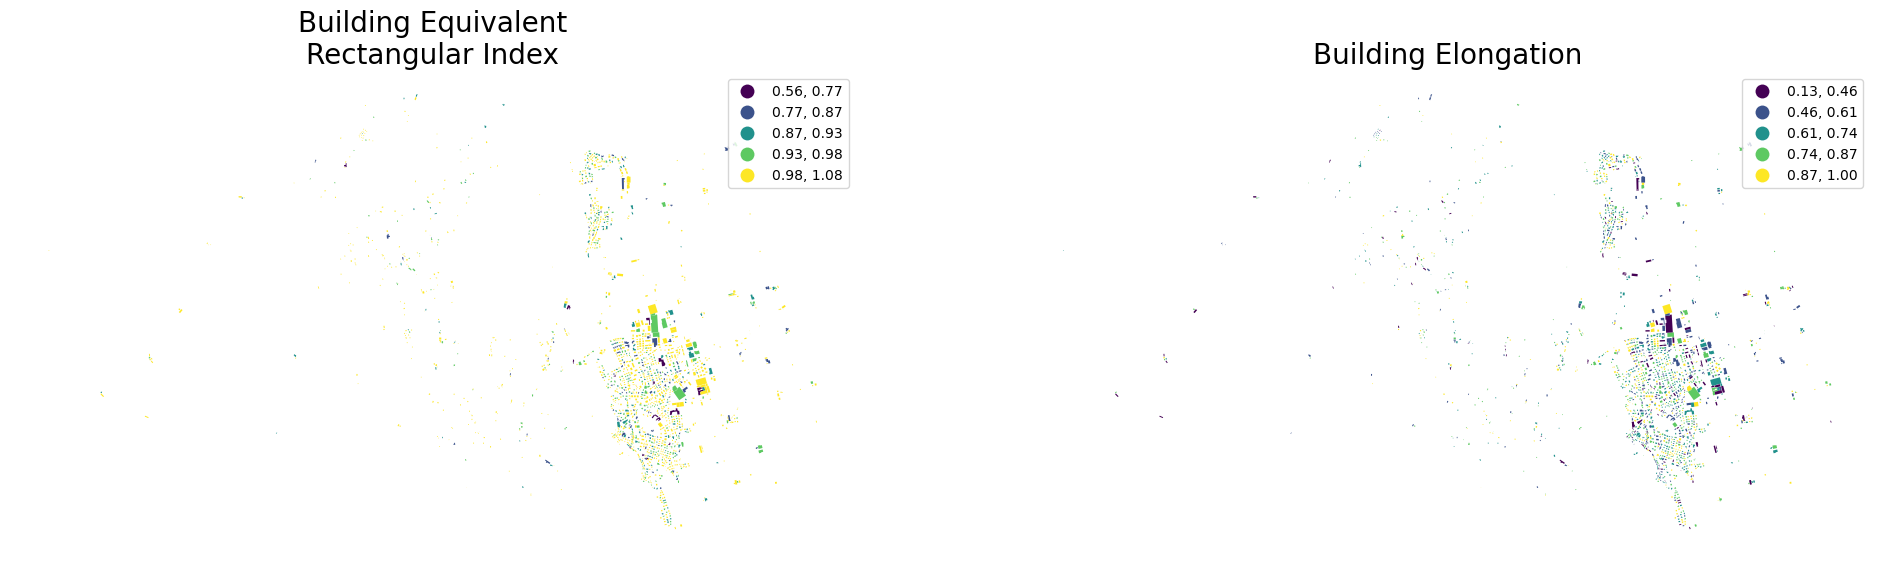

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("eri", ax=ax[0], scheme="natural_breaks", legend=True)
buildings.plot("elongation", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Building Equivalent\nRectangular Index', fontsize=20)
ax[1].set_title('Building Elongation', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Sevelen/eri_and_elongation.svg')  

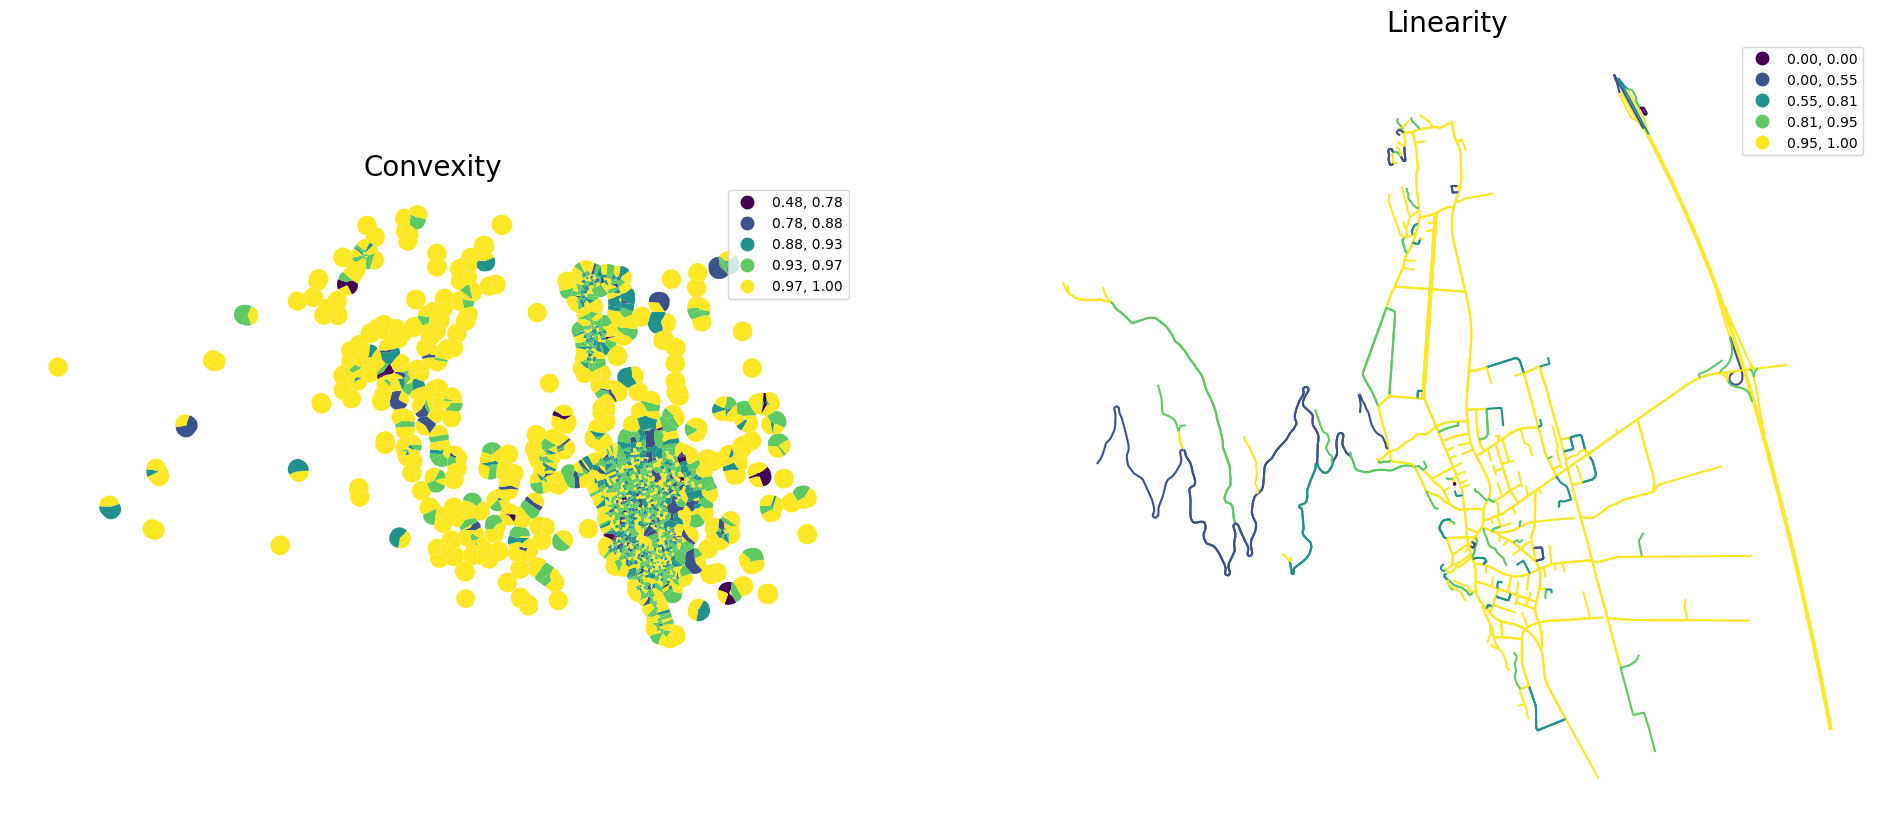

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("linearity", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Linearity', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Sevelen/convexity_and_linearity.svg')  

### Spatial distribution

In [35]:
buildings["shared_walls"] = momepy.SharedWallsRatio(buildings).series

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/momepy/distribution.py:214: FutureWarning: Class based API like `momepy.SharedWalls` or `momepy.SharedWallsRatio` is deprecated. Replace it with `momepy.shared_walls` or explicitly computing `momepy.shared_walls / gdf.length` respectively to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  super().__init__(gdf)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


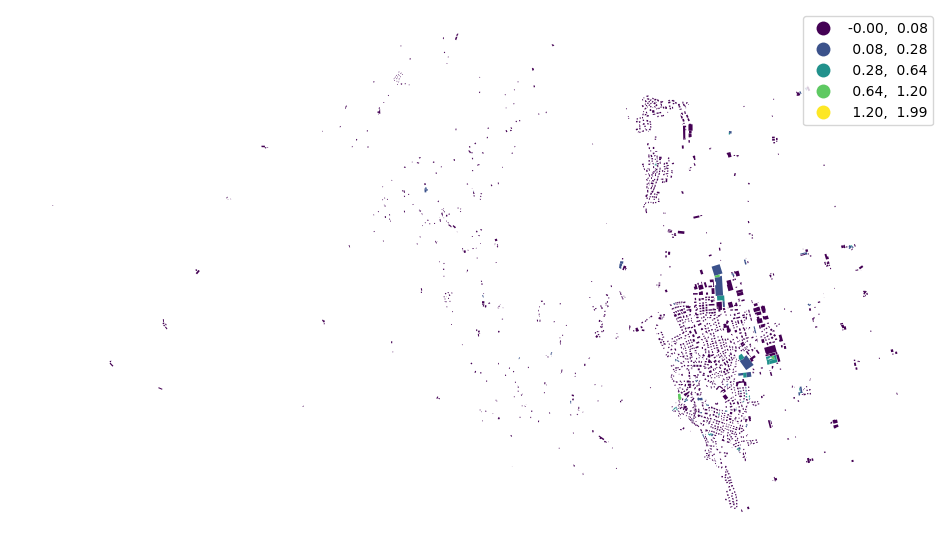

In [36]:
buildings.plot("shared_walls", figsize=(12, 12), scheme="natural_breaks", legend=True).set_axis_off()

plt.savefig('../results/Sevelen/sharedwalls.svg')  

Generate spatial weights matrix using `libpysal`.

In [37]:
queen_1 = libpysal.weights.contiguity.Queen.from_dataframe(tessellation, ids="uID", silence_warnings=True)

In [38]:
tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    buildings["neighbor_distance"] = momepy.NeighborDistance(buildings, queen_1, "uID", verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/1669107924.py:1: FutureWarning: Class based API like `momepy.Neighbors` is deprecated. Replace it with `momepy.neighbors` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/1669107924.py:2: FutureWarning: `momepy.CoveredArea` is deprecated. Replace it with `.describe()` method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series


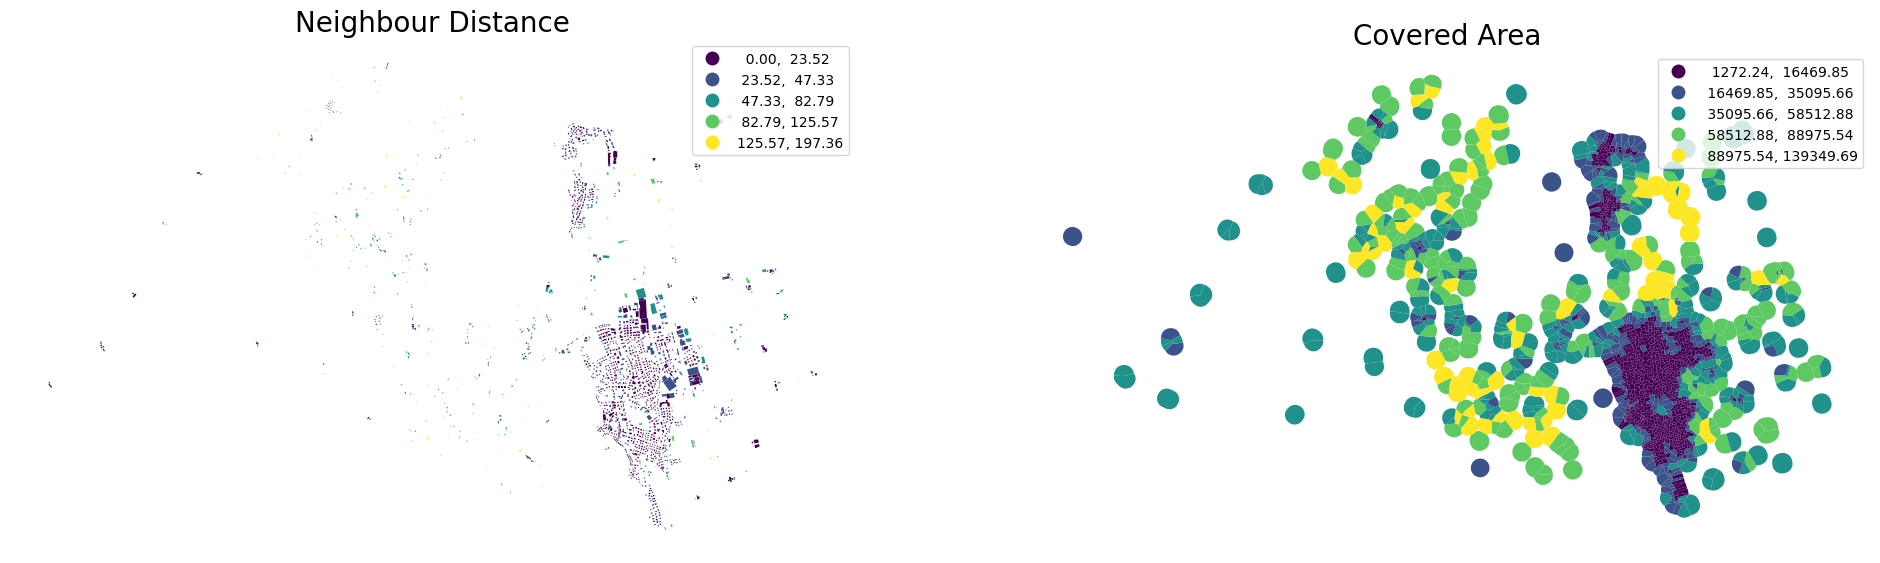

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("neighbor_distance", ax=ax[0], scheme="natural_breaks", legend=True)
tessellation.plot("covered_area", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Neighbour Distance', fontsize=20)
ax[1].set_title('Covered Area', fontsize=20)


ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Sevelen/neighbourdist_and_coveredarea.svg')  

In [40]:
queen_3 = momepy.sw_high(k=3, weights=queen_1)
buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)

buildings['interbuilding_distance'] = momepy.MeanInterbuildingDistance(buildings, queen_1, 'uID', queen_3, verbose=False).series
buildings['adjacency'] = momepy.BuildingAdjacency(buildings, queen_3, 'uID', buildings_q1, verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/3221532125.py:1: FutureWarning: `momepy.sw_high` is deprecated. Replace it with .higher_order() method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  queen_3 = momepy.sw_high(k=3, weights=queen_1)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/3221532125.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/3221532125.py:4: FutureWarning: Class based API like `momepy.MeanInterbuildingDistance` is deprecated. Replace it with `momepy.mean_interbuilding_distance` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['interbuilding_distance'] 

In [41]:
#fig, ax = plt.subplots(1, 2, figsize=(24, 12))
#
#buildings.plot("interbuilding_distance", ax=ax[0], scheme="natural_breaks", legend=True)
#buildings.plot("adjacency", ax=ax[1], scheme="natural_breaks", legend=True)
#
#ax[0].set_axis_off()
#ax[1].set_axis_off()

In [42]:
profile = momepy.StreetProfile(streets, buildings)
streets["width"] = profile.w
streets["width_deviation"] = profile.wd
streets["openness"] = profile.o

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/2648127835.py:1: FutureWarning: Class based API like `momepy.StreetProfile` is deprecated. Replace it with `momepy.street_profile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  profile = momepy.StreetProfile(streets, buildings)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in intersection
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [43]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

streets.plot("width", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("width_deviation", ax=ax[1], scheme="natural_breaks", legend=True)
streets.plot("openness", ax=ax[2], scheme="natural_breaks", legend=True)

ax[0].set_title('Width', fontsize=20)
ax[1].set_title('Width Deviation', fontsize=20)
ax[2].set_title('Openness', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Sevelen/road_network.svg')  

### Intensity

In [44]:
tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/1819725789.py:1: FutureWarning: `momepy.AreaRatio` is deprecated. Replace it with a direct division of areas or momepy.describe_agg() or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series


In [45]:
tessellation.plot("car", figsize=(12, 12), vmin=0, vmax=1, legend=True).set_axis_off()
plt.title("Building/Tessellation Area Ratio")

plt.savefig('../results/Sevelen/tessellation_ratio.svg')  

### Connectivity

In [46]:
graph = momepy.gdf_to_nx(streets)

In [47]:
graph = momepy.node_degree(graph)
graph = momepy.closeness_centrality(graph, radius=400, distance="mm_len")
graph = momepy.meshedness(graph, radius=400, distance="mm_len")

  0%|          | 0/403 [00:00<?, ?it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

In [48]:
nodes, streets = momepy.nx_to_gdf(graph)

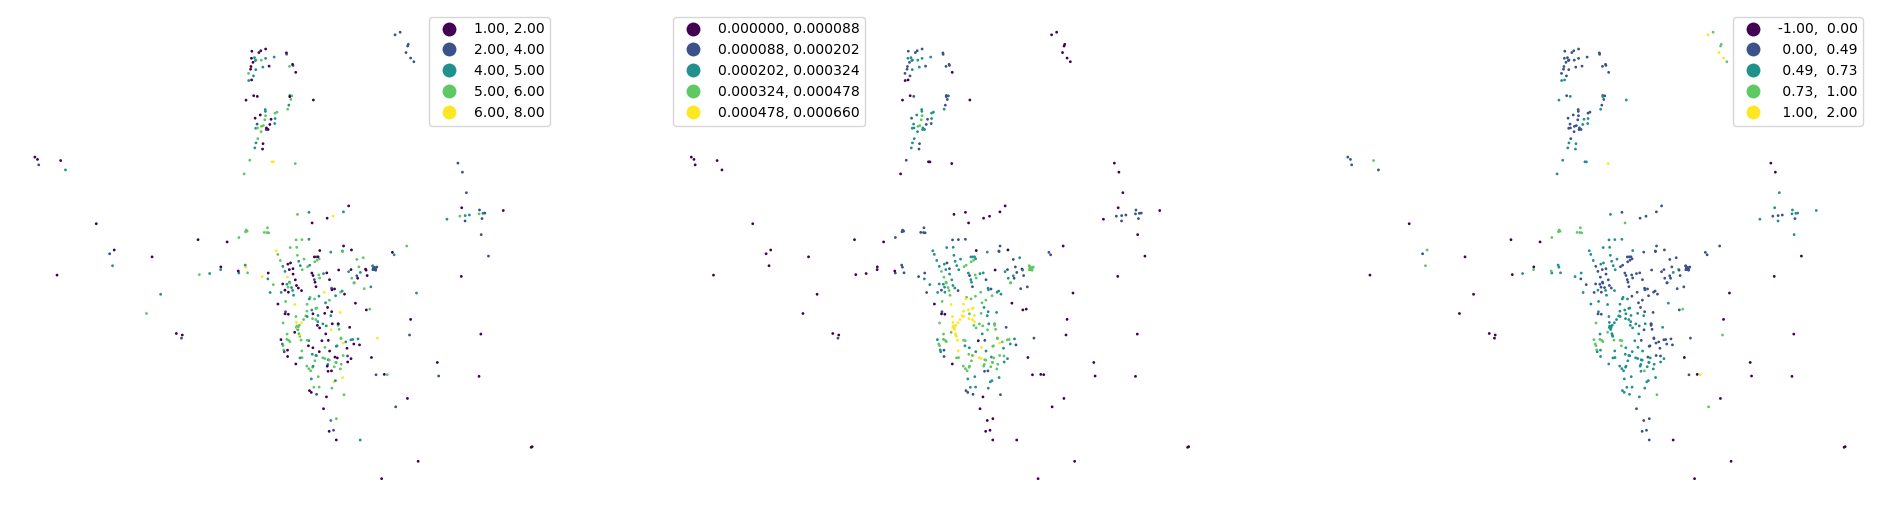

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

nodes.plot("degree", ax=ax[0], scheme="natural_breaks", legend=True, markersize=1)
nodes.plot("closeness", ax=ax[1], scheme="natural_breaks", legend=True, markersize=1, legend_kwds={"fmt": "{:.6f}"})
nodes.plot("meshedness", ax=ax[2], scheme="natural_breaks", legend=True, markersize=1)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Sevelen/connectivity.svg')  

In [50]:
buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/403706460.py:1: FutureWarning: Class based API like `momepy.get_node_id` is deprecated. Replace it with `momepy.get_nearest_node` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")


  0%|          | 0/1937 [00:00<?, ?it/s]

Link all data together (to tessellation cells or buildings).

In [51]:
tessellation

uID                                           geometry    nID  \
0      672  POLYGON ((2755740.743 1219624.304, 2755741.485...  275.0   
1      673  POLYGON ((2755830.442 1219677.926, 2755830.319...  398.0   
2       21  POLYGON ((2756975.672 1220182.410, 2756979.232...  792.0   
3     1789  POLYGON ((2757395.055 1220845.269, 2757401.525...  793.0   
4      674  POLYGON ((2756106.850 1219946.070, 2756109.410...  788.0   
...    ...                                                ...    ...   
1932  1754  POLYGON ((2755001.258 1223613.821, 2754999.045...  691.0   
1933  1753  POLYGON ((2754977.388 1223629.010, 2754977.036...  688.0   
1934  1752  POLYGON ((2754951.999 1223632.655, 2754951.229...  688.0   
1935  1763  POLYGON ((2755062.819 1223636.781, 2755062.063...  691.0   
1936  1677  POLYGON ((2754081.965 1224144.231, 2754078.815...    NaN   

              area  convexity  neighbors  covered_area       car  
0     14465.712500   0.985519   0.008163  50470.394434  0.016147  
1     25990.552916   0.997616   0.004943  46627.197528  0.016296  
2     39510.709889   1.000000   0.000000  39510.709889  0.009528  
3     37268.343059   1.000000   0.000000  37268.343059  0.004444  
4     22245.445653   0.925835   0.003256  47044.661604  0.028868  
...            ...        ...        ...           ...       ...  
1932   4345.532717   0.930402   0.015443  21228.836082  0.082194  
1933   4868.445470   0.969382   0.015067  14829.360390  0.055381  
1934   2912.553021   0.859531   0.016765  13463.696281  0.096083  
1935   6887.039874   0.991930   0.008915  21131.648023  0.023056  
1936  38900.234308   0.999982   0.000000  38900.234308  0.007473  

[1937 rows x 8 columns]

In [52]:
merged = tessellation.merge(buildings.drop(columns=['nID', 'geometry']), on='uID')
merged = merged.merge(streets.drop(columns='geometry'), on='nID', how='left')
merged = merged.merge(nodes.drop(columns='geometry'), on='nodeID', how='left')

In [53]:
merged.columns

Index(['uID', 'geometry', 'nID', 'area_x', 'convexity', 'neighbors',
       'covered_area', 'car', 'area_y', 'eri', 'elongation', 'shared_walls',
       'neighbor_distance', 'interbuilding_distance', 'adjacency', 'nodeID',
       'length', 'linearity', 'width', 'width_deviation', 'openness', 'mm_len',
       'node_start', 'node_end', 'x', 'y', 'degree', 'closeness',
       'meshedness'],
      dtype='object')

## Understanding the context

Measure first, second and third quartile of distribution of values within an area around each building.

In [54]:
percentiles = []
for column in merged.columns.drop(["uID", "nodeID", "nID", 'mm_len', 'node_start', 'node_end', "geometry"]):
    perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
    perc.columns = [f"{column}_" + str(x) for x in perc.columns]
    percentiles.append(perc)

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_42339/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API

In [55]:
percentiles_joined = pandas.concat(percentiles, axis=1)

In [56]:
percentiles_joined

area_x_25     area_x_50     area_x_75  convexity_25  convexity_50  \
0      1343.647081   2579.545947   8192.844246      0.957503      0.974203   
1       997.731229   2147.135102   5451.230101      0.951050      0.959980   
2     39510.709889  39510.709889  39510.709889      1.000000      1.000000   
3     37268.343059  37268.343059  37268.343059      1.000000      1.000000   
4     12399.607976  12418.925644  17332.185648      0.959843      0.993850   
...            ...           ...           ...           ...           ...   
1932   1050.382501   1910.163538   4366.343848      0.932952      0.963616   
1933    639.399910   1127.177947   2549.672621      0.929856      0.961819   
1934    549.041328    938.668430   1978.249065      0.924653      0.959295   
1935   1186.613774   1910.163538   5064.063851      0.926041      0.951579   
1936  38900.234308  38900.234308  38900.234308      0.999982      0.999982   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         0.986934      0.013001      0.019307      0.032285     21509.502114   
1         0.984212      0.012369      0.022858      0.043805     13524.020183   
2         1.000000      0.000000      0.000000      0.000000     39510.709889   
3         1.000000      0.000000      0.000000      0.000000     37268.343059   
4         0.993931      0.003934      0.004613      0.004614     47044.661604   
...            ...           ...           ...           ...              ...   
1932      0.976923      0.018367      0.032658      0.044076     10383.833851   
1933      0.974298      0.020241      0.040927      0.058556      6124.118692   
1934      0.974853      0.032658      0.046320      0.060026      5105.280128   
1935      0.976692      0.016104      0.029446      0.039263     13268.372598   
1936      0.999982      0.000000      0.000000      0.000000     38900.234308   

      ...          y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ...  1.219814e+06        1.0        4.0        5.0      0.000055   
1     ...  1.219873e+06        1.0        4.0        5.5      0.000055   
2     ...  1.220363e+06        4.0        4.0        4.0      0.000018   
3     ...  1.220788e+06        1.0        1.0        1.0      0.000000   
4     ...  1.220051e+06        4.0        4.0        4.0      0.000020   
...   ...           ...        ...        ...        ...           ...   
1932  ...  1.223607e+06        1.0        5.0        5.0      0.000158   
1933  ...  1.223645e+06        1.0        5.0        5.0      0.000163   
1934  ...  1.223652e+06        1.0        5.0        5.0      0.000179   
1935  ...  1.223621e+06        1.0        5.0        5.0      0.000153   
1936  ...           NaN        NaN        NaN        NaN           NaN   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0         0.000055      0.000071       0.285714       0.363636       0.400000  
1         0.000063      0.000075       0.285714       0.363636       0.400000  
2         0.000018      0.000018       0.000000       0.000000       0.000000  
3         0.000000      0.000000       0.000000       0.000000       0.000000  
4         0.000020      0.000020       1.000000       1.000000       1.000000  
...            ...           ...            ...            ...            ...  
1932      0.000207      0.000224       0.258065       0.265993       0.282051  
1933      0.000224      0.000257       0.258065       0.282051       0.282051  
1934      0.000224      0.000261       0.258065       0.282051       0.296296  
1935      0.000193      0.000224       0.256410       0.259259       0.307692  
1936           NaN           NaN            NaN            NaN            NaN  

[1937 rows x 66 columns]

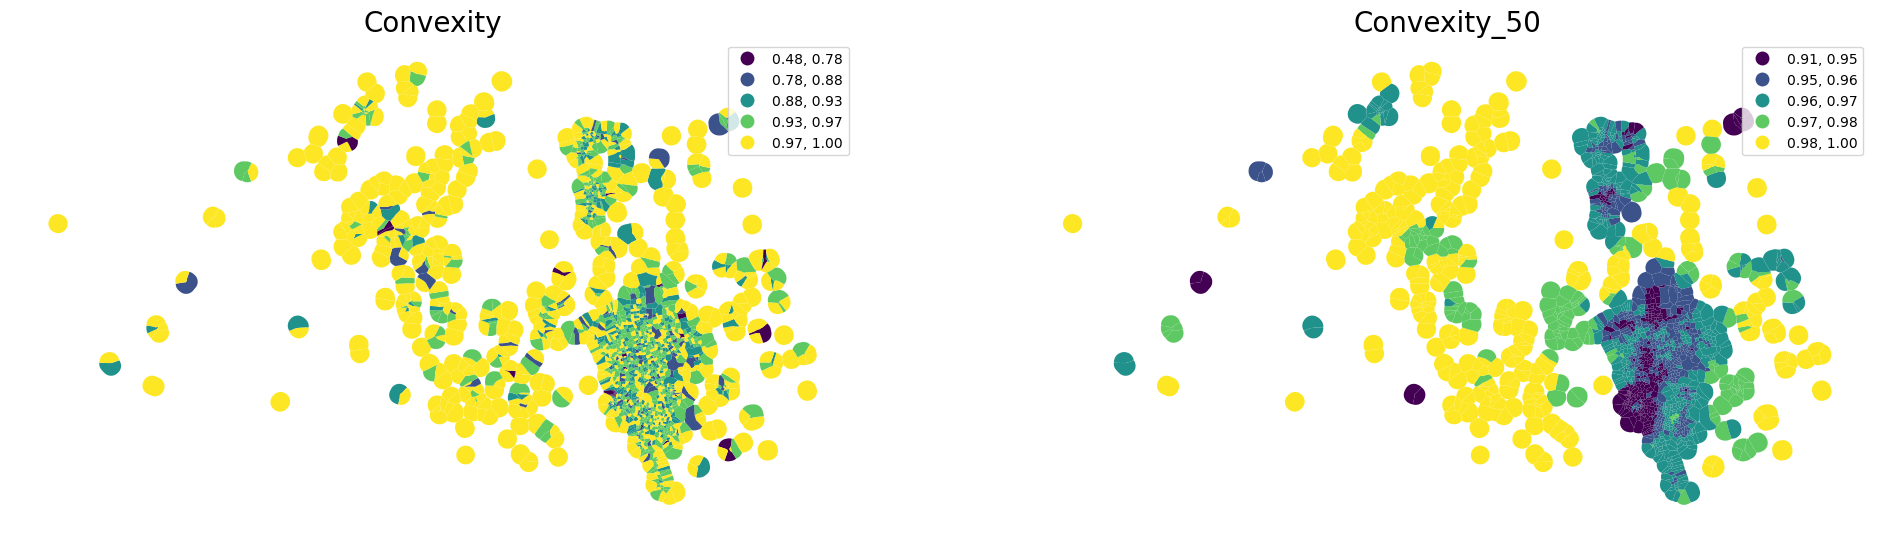

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
merged.plot(percentiles_joined['convexity_50'].values, ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Convexity_50', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Sevelen/convexity.svg')  

## Clustering

Standardize values before clustering.

In [58]:
standardized = (percentiles_joined - percentiles_joined.mean()) / percentiles_joined.std()

In [59]:
standardized

area_x_25  area_x_50  area_x_75  convexity_25  convexity_50  \
0     -0.313363  -0.305170   0.164976      0.874130      0.708452   
1     -0.381275  -0.373471  -0.182550      0.562358     -0.259139   
2      7.179786   5.528219   4.134818      2.927261      2.463334   
3      6.739553   5.174030   3.850577      2.927261      2.463334   
4      1.857198   1.248989   1.323476      0.987146      2.044957   
...         ...        ...        ...           ...           ...   
1932  -0.370938  -0.410901  -0.320070     -0.311991     -0.011753   
1933  -0.451625  -0.534576  -0.550351     -0.461580     -0.134052   
1934  -0.469364  -0.564352  -0.622784     -0.712945     -0.305687   
1935  -0.344193  -0.410901  -0.231627     -0.645873     -0.830616   
1936   7.059934   5.431792   4.057435      2.926392      2.462110   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         0.762254     -0.848872     -0.828894     -0.473819         0.142860   
1         0.491140     -0.892815     -0.611864      0.151843        -0.278620   
2         2.063840     -1.753444     -2.008619     -2.227254         1.092976   
3         2.063840     -1.753444     -2.008619     -2.227254         0.974622   
4         1.459286     -1.479712     -1.726759     -1.976652         1.490623   
...            ...           ...           ...           ...              ...   
1932     -0.234958     -0.475481     -0.013062      0.166538        -0.444361   
1933     -0.496518     -0.345065      0.492242      0.952951        -0.669192   
1934     -0.441170      0.518863      0.821771      1.032816        -0.722967   
1935     -0.258061     -0.632928     -0.209299     -0.094832        -0.292113   
1936      2.062048     -1.753444     -2.008619     -2.227254         1.060755   

      ...      y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ... -1.853245  -1.107793  -0.491929  -0.379262     -0.899344   
1     ... -1.789930  -1.107793  -0.491929  -0.039979     -0.899344   
2     ... -1.261055   0.398763  -0.491929  -1.057828     -1.173863   
3     ... -0.803236  -1.107793  -2.393045  -3.093527     -1.305373   
4     ... -1.597624   0.398763  -0.491929  -1.057828     -1.155962   
...   ...       ...        ...        ...        ...           ...   
1932  ...  2.236402  -1.107793   0.141776  -0.379262     -0.134317   
1933  ...  2.277762  -1.107793   0.141776  -0.379262     -0.097519   
1934  ...  2.285157  -1.107793   0.141776  -0.379262      0.016971   
1935  ...  2.251361  -1.107793   0.141776  -0.379262     -0.171115   
1936  ...       NaN        NaN        NaN        NaN           NaN   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0        -1.117493     -1.166251      -0.663670      -0.511352      -0.581046  
1        -1.065789     -1.140509      -0.663670      -0.511352      -0.581046  
2        -1.356929     -1.475119      -1.933294      -2.073528      -2.116210  
3        -1.471632     -1.578455      -1.933294      -2.073528      -2.116210  
4        -1.341316     -1.461054       2.510391       2.222457       1.721699  
...            ...           ...            ...            ...            ...  
1932     -0.136845     -0.279404      -0.786537      -0.930825      -1.033723  
1933     -0.029685     -0.084401      -0.786537      -0.861840      -1.033723  
1934     -0.029685     -0.063387      -0.786537      -0.861840      -0.979052  
1935     -0.223912     -0.279404      -0.793888      -0.959754      -0.935315  
1936           NaN           NaN            NaN            NaN            NaN  

[1937 rows x 66 columns]

### How many clusters?

In [60]:
cgram = Clustergram(range(1, 12), n_init=10, random_state=0)
cgram.fit(standardized.fillna(0))

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.028 seconds.
K=3 fitted in 0.039 seconds.
K=4 fitted in 0.034 seconds.
K=5 fitted in 0.043 seconds.
K=6 fitted in 0.040 seconds.
K=7 fitted in 0.043 seconds.
K=8 fitted in 0.092 seconds.
K=9 fitted in 0.057 seconds.
K=10 fitted in 0.049 seconds.
K=11 fitted in 0.057 seconds.


Clustergram(k_range=range(1, 12), backend='sklearn', method='kmeans', kwargs={'n_init': 10, 'random_state': 0})

In [61]:
show(cgram.bokeh())

In [62]:
cgram.labels.head()

1   2   3   4   5   6   7   8   9   10  11
0   0   0   2   0   3   4   3   5   1   7   2
1   0   0   2   0   3   4   3   5   1   7   2
2   0   1   0   1   2   2   6   6   5   3   7
3   0   1   0   1   2   2   6   6   5   3   7
4   0   1   0   1   2   2   6   6   5   3   7

In [63]:
merged["cluster"] = cgram.labels[8].values

In [64]:
urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")

In [65]:
urban_types.explore("cluster", categorical=True, prefer_canvas=True, tiles="CartoDB Positron", tooltip=False)

## Export

Save cluster output geodata to geojson file:

In [66]:
urban_types.to_file('../data/raw/Sevelen.geojson', driver='GeoJSON')

## Utilities

Once you run the cell below, it hides all cells below the currently active one (aka presentation mode).

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: none;
}
</style>

Run this cell to turn the presentation mode off.

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: block;
}
</style>